In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random

In [2]:
industry_portfolios=pd.read_excel('Industry_Portfolios.xlsx',index_col='Date')

/Users/liujing/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
industry_portfolios

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [4]:
industry_portfolios.columns

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
       'Utils', 'Other'],
      dtype='object')

In [5]:
market_portfolio=pd.read_excel('Market_Portfolio.xlsx',index_col="Date")

/Users/liujing/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [6]:
market_portfolio

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [7]:
Ri=(industry_portfolios-market_portfolio.values).mean()
Ri

NoDur    0.154750
Durbl   -0.014750
Manuf    0.264750
Enrgy    0.483083
HiTec    0.018167
Telcm    0.133333
Shops    0.168250
Hlth     0.035750
Utils    0.159083
Other   -0.259000
dtype: float64

In [8]:
Vij=np.cov(industry_portfolios-market_portfolio.values,rowvar= False)
Vij

array([[ 5.43969574, -6.07303523, -1.39619166, -1.20053326, -1.88315088,
         1.53888487,  1.14074116,  3.81513716,  4.27200187, -1.7687384 ],
       [-6.07303523, 26.62890078,  4.90802359, -3.48105498,  1.89157693,
        -1.70762521, -0.35433527, -8.08294641, -9.61749011,  4.38586529],
       [-1.39619166,  4.90802359,  2.9504991 ,  1.66613313,  0.06526676,
        -0.62641597, -1.15459666, -2.28889981, -1.90141158,  0.35890361],
       [-1.20053326, -3.48105498,  1.66613313, 19.27491058, -1.51697245,
        -1.04052465, -3.7104391 , -2.48579603,  4.4543684 , -3.8648258 ],
       [-1.88315088,  1.89157693,  0.06526676, -1.51697245,  5.09874619,
        -0.77329384, -0.24535029, -1.93628433, -2.34283867, -1.40405025],
       [ 1.53888487, -1.70762521, -0.62641597, -1.04052465, -0.77329384,
         4.68256695,  0.46379748,  0.69315714,  2.72147703, -1.27177815],
       [ 1.14074116, -0.35433527, -1.15459666, -3.7104391 , -0.24535029,
         0.46379748,  4.452628  ,  0.76451015

In [9]:
Vij.shape

(10, 10)

In [10]:
pd.DataFrame(Vij)

,0,1,2,3,4,5,6,7,8,9
0,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
1,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
2,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
3,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
4,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
5,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
6,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
7,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
8,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
9,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [11]:
tracking_error=industry_portfolios.std()
tracking_error

NoDur    3.345657
Durbl    8.361852
Manuf    5.310270
Enrgy    6.081524
HiTec    5.381191
Telcm    4.448284
Shops    4.093786
Hlth     3.787172
Utils    3.701763
Other    5.582452
dtype: float64

In [12]:
mean_array=np.array(Ri)
mean_array

array([ 0.15475   , -0.01475   ,  0.26475   ,  0.48308333,  0.01816667,
        0.13333333,  0.16825   ,  0.03575   ,  0.15908333, -0.259     ])

In [13]:
cov_array=np.array(Vij)
cov_array

array([[ 5.43969574, -6.07303523, -1.39619166, -1.20053326, -1.88315088,
         1.53888487,  1.14074116,  3.81513716,  4.27200187, -1.7687384 ],
       [-6.07303523, 26.62890078,  4.90802359, -3.48105498,  1.89157693,
        -1.70762521, -0.35433527, -8.08294641, -9.61749011,  4.38586529],
       [-1.39619166,  4.90802359,  2.9504991 ,  1.66613313,  0.06526676,
        -0.62641597, -1.15459666, -2.28889981, -1.90141158,  0.35890361],
       [-1.20053326, -3.48105498,  1.66613313, 19.27491058, -1.51697245,
        -1.04052465, -3.7104391 , -2.48579603,  4.4543684 , -3.8648258 ],
       [-1.88315088,  1.89157693,  0.06526676, -1.51697245,  5.09874619,
        -0.77329384, -0.24535029, -1.93628433, -2.34283867, -1.40405025],
       [ 1.53888487, -1.70762521, -0.62641597, -1.04052465, -0.77329384,
         4.68256695,  0.46379748,  0.69315714,  2.72147703, -1.27177815],
       [ 1.14074116, -0.35433527, -1.15459666, -3.7104391 , -0.24535029,
         0.46379748,  4.452628  ,  0.76451015

In [14]:
cov_inverse=np.linalg.inv(cov_array)
cov_inverse

array([[ 5.45383229e-01,  4.52282303e-02,  2.07945041e-01,
         2.78363758e-01,  6.04680938e-01,  1.53595518e-01,
         1.80487809e-01,  1.90500937e-01,  5.74650893e-02,
         7.59500969e-01],
       [ 4.52282303e-02,  8.96520899e-02, -8.74489380e-02,
         3.89464036e-02,  4.29778706e-02,  6.25343163e-03,
        -7.13876686e-04,  6.30519257e-02,  2.71023736e-02,
         3.45527748e-02],
       [ 2.07945041e-01, -8.74489380e-02,  1.13979978e+00,
         4.02051132e-01,  1.05645736e+00,  3.70594533e-01,
         5.77248304e-01,  6.14377150e-01,  3.04562775e-01,
         1.39790823e+00],
       [ 2.78363758e-01,  3.89464036e-02,  4.02051132e-01,
         5.06498392e-01,  9.53963540e-01,  3.57385466e-01,
         4.62025059e-01,  5.39514740e-01,  1.89783184e-01,
         1.27657562e+00],
       [ 6.04680938e-01,  4.29778706e-02,  1.05645736e+00,
         9.53963540e-01,  2.30237254e+00,  7.43644981e-01,
         9.52973363e-01,  1.15990395e+00,  5.37592942e-01,
         2.

In [15]:
e=np.ones(10)
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
trans_e=np.array(e)
trans_e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
Alpha=mean_array@cov_inverse@e
Alpha

2.9321278826306267

In [18]:
Zeta=mean_array@cov_inverse@mean_array
Zeta

0.20474497351130097

In [19]:
Delta=trans_e@cov_inverse@e
Delta

58.55025437639908

In [20]:
Rmv=Alpha/Delta
Rmv

0.05007882397540075

In [45]:
Rp=np.linspace(0,0.1,201)
Rp

array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 , 0.0235,
       0.024 , 0.0245, 0.025 , 0.0255, 0.026 , 0.0265, 0.027 , 0.0275,
       0.028 , 0.0285, 0.029 , 0.0295, 0.03  , 0.0305, 0.031 , 0.0315,
       0.032 , 0.0325, 0.033 , 0.0335, 0.034 , 0.0345, 0.035 , 0.0355,
       0.036 , 0.0365, 0.037 , 0.0375, 0.038 , 0.0385, 0.039 , 0.0395,
       0.04  , 0.0405, 0.041 , 0.0415, 0.042 , 0.0425, 0.043 , 0.0435,
       0.044 , 0.0445, 0.045 , 0.0455, 0.046 , 0.0465, 0.047 , 0.0475,
       0.048 , 0.0485, 0.049 , 0.0495, 0.05  , 0.0505, 0.051 , 0.0515,
       0.052 , 0.0525, 0.053 , 0.0535, 0.054 , 0.0545, 0.055 , 0.0555,
      

In [46]:
def var_of_return(x):
    return (1/Delta) + Delta/[(Zeta*Delta-Alpha*Alpha)]*(x-Rmv)**2

In [47]:
Var_p=var_of_return(Rp)
Var_p

array([0.06038791, 0.05952741, 0.05867556, 0.05783234, 0.05699775,
       0.0561718 , 0.05535448, 0.05454579, 0.05374575, 0.05295433,
       0.05217155, 0.0513974 , 0.05063189, 0.04987502, 0.04912677,
       0.04838717, 0.04765619, 0.04693385, 0.04622015, 0.04551508,
       0.04481864, 0.04413084, 0.04345167, 0.04278114, 0.04211924,
       0.04146598, 0.04082135, 0.04018536, 0.039558  , 0.03893927,
       0.03832918, 0.03772772, 0.0371349 , 0.03655071, 0.03597516,
       0.03540824, 0.03484996, 0.03430031, 0.03375929, 0.03322691,
       0.03270316, 0.03218805, 0.03168157, 0.03118373, 0.03069452,
       0.03021395, 0.02974201, 0.0292787 , 0.02882403, 0.028378  ,
       0.0279406 , 0.02751183, 0.0270917 , 0.0266802 , 0.02627733,
       0.0258831 , 0.02549751, 0.02512055, 0.02475222, 0.02439253,
       0.02404147, 0.02369905, 0.02336526, 0.02304011, 0.02272359,
       0.02241571, 0.02211646, 0.02182584, 0.02154386, 0.02127051,
       0.0210058 , 0.02074972, 0.02050228, 0.02026347, 0.02003

In [48]:
sqrt=np.sqrt(Var_p)
sqrt

array([0.24573951, 0.24398241, 0.24223038, 0.24048355, 0.23874201,
       0.2370059 , 0.23527533, 0.23355041, 0.23183129, 0.23011808,
       0.22841092, 0.22670996, 0.22501532, 0.22332715, 0.2216456 ,
       0.21997083, 0.21830298, 0.21664222, 0.21498872, 0.21334263,
       0.21170414, 0.21007342, 0.20845065, 0.20683602, 0.20522973,
       0.20363197, 0.20204294, 0.20046286, 0.19889192, 0.19733036,
       0.19577839, 0.19423626, 0.19270418, 0.19118241, 0.18967119,
       0.18817078, 0.18668143, 0.18520342, 0.18373702, 0.1822825 ,
       0.18084016, 0.17941029, 0.17799319, 0.17658916, 0.17519853,
       0.1738216 , 0.17245872, 0.17111021, 0.16977642, 0.1684577 ,
       0.16715441, 0.1658669 , 0.16459555, 0.16334074, 0.16210285,
       0.16088227, 0.15967939, 0.15849463, 0.15732839, 0.15618108,
       0.15505313, 0.15394496, 0.152857  , 0.15178969, 0.15074346,
       0.14971875, 0.14871602, 0.14773571, 0.14677826, 0.14584413,
       0.14493377, 0.14404763, 0.14318616, 0.14234981, 0.14153

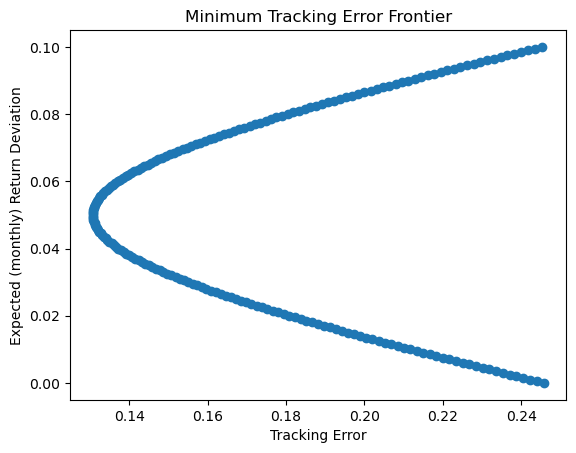

In [49]:
plt.scatter(sqrt,Rp)
plt.plot(sqrt,Rp)
plt.title('Minimum Tracking Error Frontier')
plt.xlabel('Tracking Error')
plt.ylabel('Expected (monthly) Return Deviation')
plt.show()

In [50]:
Rf=0
def Var_of_return(x):
    return (x-Rf)**2/(Zeta-2*Alpha*Rf+Delta*Rf**2)
Var_of_return(Rp)

array([0.00000000e+00, 1.22103120e-06, 4.88412479e-06, 1.09892808e-05,
       1.95364991e-05, 3.05257799e-05, 4.39571231e-05, 5.98305286e-05,
       7.81459966e-05, 9.89035269e-05, 1.22103120e-04, 1.47744775e-04,
       1.75828492e-04, 2.06354272e-04, 2.39322115e-04, 2.74732019e-04,
       3.12583986e-04, 3.52878016e-04, 3.95614108e-04, 4.40792262e-04,
       4.88412479e-04, 5.38474758e-04, 5.90979099e-04, 6.45925503e-04,
       7.03313969e-04, 7.63144498e-04, 8.25417089e-04, 8.90131742e-04,
       9.57288458e-04, 1.02688724e-03, 1.09892808e-03, 1.17341098e-03,
       1.25033595e-03, 1.32970297e-03, 1.41151206e-03, 1.49576322e-03,
       1.58245643e-03, 1.67159171e-03, 1.76316905e-03, 1.85718845e-03,
       1.95364991e-03, 2.05255344e-03, 2.15389903e-03, 2.25768668e-03,
       2.36391640e-03, 2.47258817e-03, 2.58370201e-03, 2.69725791e-03,
       2.81325588e-03, 2.93169590e-03, 3.05257799e-03, 3.17590214e-03,
       3.30166836e-03, 3.42987663e-03, 3.56052697e-03, 3.69361937e-03,
      

In [51]:
std_dev_return=np.sqrt(Var_of_return(Rp))
std_dev_return

array([0.        , 0.001105  , 0.00221001, 0.00331501, 0.00442001,
       0.00552501, 0.00663002, 0.00773502, 0.00884002, 0.00994503,
       0.01105003, 0.01215503, 0.01326003, 0.01436504, 0.01547004,
       0.01657504, 0.01768004, 0.01878505, 0.01989005, 0.02099505,
       0.02210006, 0.02320506, 0.02431006, 0.02541506, 0.02652007,
       0.02762507, 0.02873007, 0.02983508, 0.03094008, 0.03204508,
       0.03315008, 0.03425509, 0.03536009, 0.03646509, 0.0375701 ,
       0.0386751 , 0.0397801 , 0.0408851 , 0.04199011, 0.04309511,
       0.04420011, 0.04530511, 0.04641012, 0.04751512, 0.04862012,
       0.04972513, 0.05083013, 0.05193513, 0.05304013, 0.05414514,
       0.05525014, 0.05635514, 0.05746015, 0.05856515, 0.05967015,
       0.06077515, 0.06188016, 0.06298516, 0.06409016, 0.06519517,
       0.06630017, 0.06740517, 0.06851017, 0.06961518, 0.07072018,
       0.07182518, 0.07293019, 0.07403519, 0.07514019, 0.07624519,
       0.0773502 , 0.0784552 , 0.0795602 , 0.0806652 , 0.08177

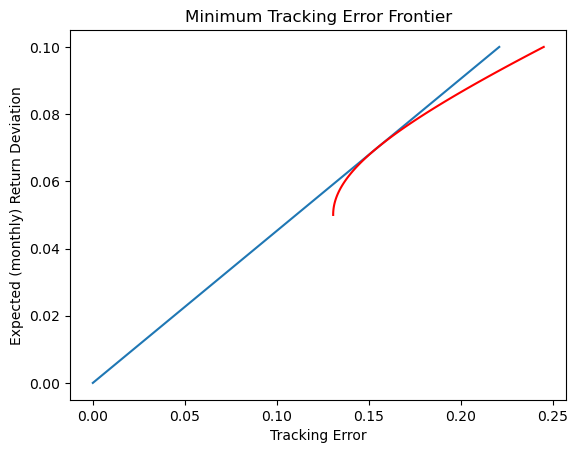

In [52]:
x=std_dev_return
y=Rp
plt.plot(x,y)
plt.plot(sqrt[Rp>=0.05], Rp[Rp>=0.05], linestyle = '-', color ='red')
plt.title('Minimum Tracking Error Frontier')
plt.xlabel('Tracking Error')
plt.ylabel('Expected (monthly) Return Deviation')
plt.show()

In [53]:
Lambda=(Delta*Var_p-Alpha)/(Zeta*Delta-Alpha**2)
Lambda

array([ 0.17802684,  0.16316708,  0.14845643,  0.1338949 ,  0.11948246,
        0.10521914,  0.09110493,  0.07713982,  0.06332382,  0.04965693,
        0.03613915,  0.02277047,  0.00955091, -0.00351955, -0.0164409 ,
       -0.02921314, -0.04183628, -0.05431031, -0.06663522, -0.07881103,
       -0.09083774, -0.10271533, -0.11444382, -0.1260232 , -0.13745347,
       -0.14873463, -0.15986668, -0.17084963, -0.18168347, -0.1923682 ,
       -0.20290382, -0.21329033, -0.22352774, -0.23361604, -0.24355523,
       -0.25334531, -0.26298628, -0.27247815, -0.28182091, -0.29101456,
       -0.3000591 , -0.30895453, -0.31770086, -0.32629808, -0.33474619,
       -0.34304519, -0.35119508, -0.35919587, -0.36704755, -0.37475012,
       -0.38230358, -0.38970793, -0.39696318, -0.40406932, -0.41102635,
       -0.41783427, -0.42449308, -0.43100279, -0.43736338, -0.44357487,
       -0.44963725, -0.45555053, -0.46131469, -0.46692975, -0.4723957 ,
       -0.47771254, -0.48288027, -0.4878989 , -0.49276842, -0.49

In [54]:
Gama=(Zeta-Alpha*Var_p)/(Zeta*Delta-Alpha**2)
Gama

array([0.00816397, 0.00890813, 0.00964482, 0.01037405, 0.0110958 ,
       0.01181009, 0.01251692, 0.01321627, 0.01390816, 0.01459258,
       0.01526954, 0.01593903, 0.01660105, 0.0172556 , 0.01790269,
       0.01854231, 0.01917446, 0.01979914, 0.02041636, 0.02102611,
       0.02162839, 0.02222321, 0.02281056, 0.02339044, 0.02396285,
       0.0245278 , 0.02508528, 0.02563529, 0.02617784, 0.02671292,
       0.02724053, 0.02776067, 0.02827335, 0.02877856, 0.0292763 ,
       0.02976658, 0.03024939, 0.03072473, 0.0311926 , 0.03165301,
       0.03210595, 0.03255142, 0.03298943, 0.03341997, 0.03384304,
       0.03425864, 0.03466678, 0.03506745, 0.03546065, 0.03584639,
       0.03622466, 0.03659546, 0.03695879, 0.03731466, 0.03766306,
       0.03800399, 0.03833746, 0.03866346, 0.03898199, 0.03929305,
       0.03959665, 0.03989278, 0.04018144, 0.04046264, 0.04073637,
       0.04100263, 0.04126142, 0.04151275, 0.04175661, 0.041993  ,
       0.04222193, 0.04244338, 0.04265738, 0.0428639 , 0.04306

In [55]:
Rtg=(Alpha*Rf-Zeta)/(Delta*Rf-Alpha)
Rtg

0.06982811859065617

In [56]:
portfolio_weights=pd.DataFrame([(Delta*Rtg-Alpha)/(Zeta*Delta-Alpha*Alpha)]*cov_inverse@mean_array+[(Zeta-Alpha*Rtg)/(Zeta*Delta-Alpha*Alpha)]*cov_inverse@e)
portfolio_weights.columns = ["Weights"]
portfolio_weights.index = (['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth','Utils', 'Other'])
portfolio_weights

,Weights
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162
Other,0.222304


In [57]:
information_ratio=linregress(std_dev_return,Rp)
information_ratio[0]

0.452487539619934

In [58]:
mean=industry_portfolios.mean()
mean

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [59]:
V=industry_portfolios.cov()
V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [60]:
df=pd.DataFrame(columns=['mean_p','std_dev'],index=range(100000))
df

,mean_p,std_dev
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,NaN,NaN
99996,NaN,NaN
99997,NaN,NaN
99998,NaN,NaN


In [61]:
i=0
for i in range(100000):
    w=np.array([random.random() for _ in range(10)])
    weight=w/w.sum()
    mean_p=weight@mean
    variance_p=weight.T@V@weight
    std_dev=np.sqrt(variance_p)
    df.iloc[i]=[mean_p,std_dev]
    i+=1

In [62]:
df

,mean_p,std_dev
0,0.831738,4.502956
1,0.846383,4.070155
2,0.854632,4.567231
3,0.851634,4.367766
4,0.834412,4.097681
...,...,...
99995,0.843127,4.420521
99996,0.886892,4.21098
99997,0.832793,4.310085
99998,0.845224,4.161287


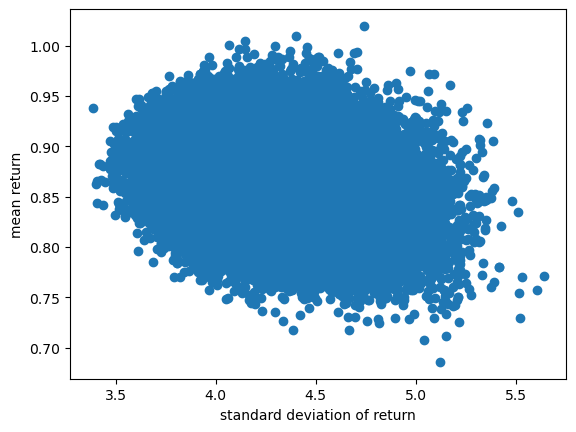

In [63]:
plt.scatter(df['std_dev'],df['mean_p'])
plt.xlabel('standard deviation of return')
plt.ylabel('mean return')
plt.show()

In [64]:
df_1=pd.DataFrame(columns=['mean_p','std_dev'],index=range(100000))
df_1

,mean_p,std_dev
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,NaN,NaN
99996,NaN,NaN
99997,NaN,NaN
99998,NaN,NaN


In [65]:
i=0
for i in range(100000):
    w_inverse=np.array([random.random() for _ in range(10)])
    weight_inverse=1/w_inverse
    weight=weight_inverse/weight_inverse.sum()
    mean_p=weight@mean
    variance_p=weight.T@V@weight
    std_dev=np.sqrt(variance_p)
    df_1.iloc[i]=[mean_p,std_dev]
    i+=1

In [66]:
df_1

,mean_p,std_dev
0,0.8964,3.84335
1,0.824946,4.682082
2,0.871232,4.144592
3,0.858452,4.180877
4,0.86467,4.561142
...,...,...
99995,0.834368,5.066051
99996,0.870173,4.457959
99997,0.84983,4.144991
99998,0.787888,4.192316


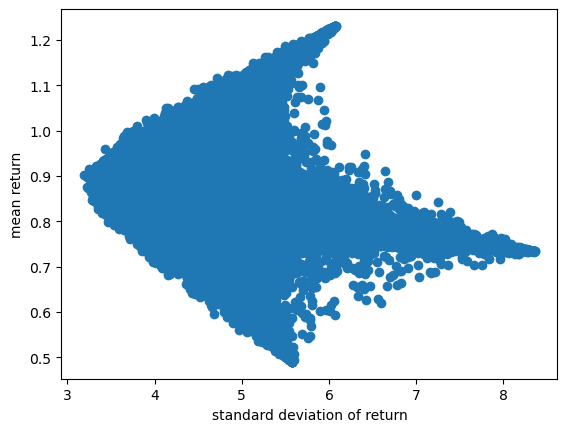

In [67]:
plt.scatter(df_1['std_dev'],df_1['mean_p'])
plt.xlabel('standard deviation of return')
plt.ylabel('mean return')
plt.show()